# 1次元入力のニューラルネットワークモデル

In [2]:
# list 3-2-(1) データを作成する

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

# 小数点以下の表示桁数を3桁にする (A)
np.set_printoptions(precision=3, suppress=True)
plt.rcParams['font.size'] = 14              # フォントサイズを設定 (B)
plt.rcParams['figure.figsize'] = (7, 4)     # 図のサイズ指定 (C)

n = 30                              # データ数
noise = 5                           # ノイズの大きさ
np.random.seed(3)                   # 乱数のseedを指定
xs = np.random.rand(n) * 30         # xs(気温)を一様乱数で決める
ts = (0.1 * xs) ** 4 + 1 * xs + 50 \
    + np.random.randn(n) * noise    # ts(売り上げ)を決める (D)
x_range = (0, 30)                   # 表示用のxの範囲
t_range = (30, 140)                 # 表示用のtの範囲

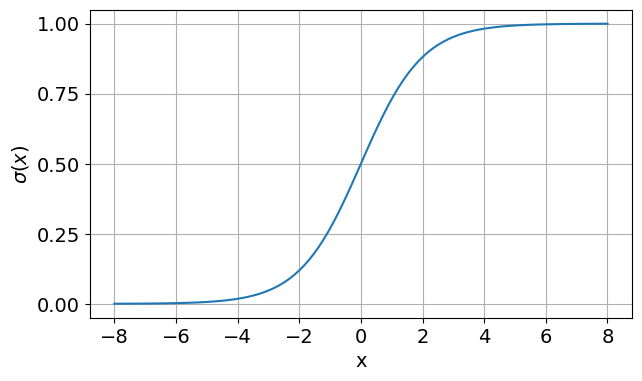

In [3]:
# list 3-2-(2) シグモイド関数

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))  # 式(3-15) (A)
    return y

xx = np.linspace(-8, 8, 100)
yy = sigmoid(xx)
plt.plot(xx, yy)
plt.yticks(ticks=[0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.grid(axis='both')
plt.show()

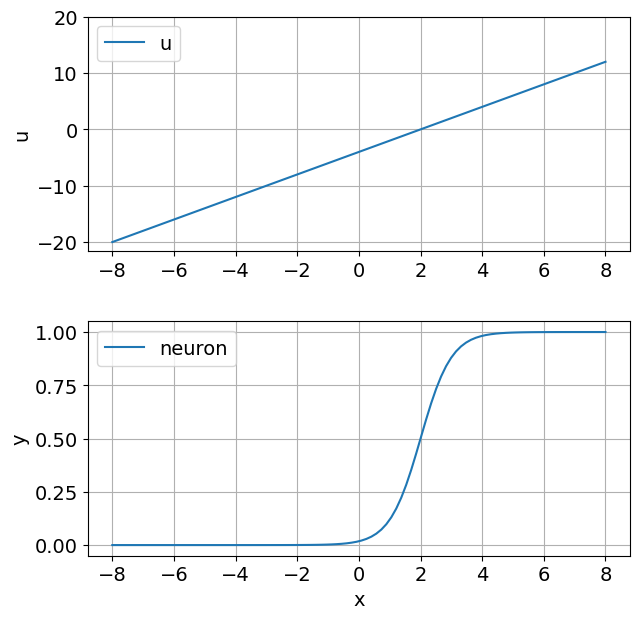

In [4]:
# list 3-2-(3) ニューロンモデル

w0 = 2
w1 = -4

x = np.linspace(-8, 8, 100)
u = w0 * x + w1
y = sigmoid(u)

# 入力総和の表示
plt.figure(figsize=(7, 7))
plt.subplots_adjust(hspace=0.3)
plt.subplot(211)
plt.plot(x, u, label='u')
plt.yticks(ticks=[-20, -10, 0, 10, 20])
plt.legend(loc='upper left')
plt.ylabel('u')
plt.grid(axis='both')

# 出力の表示
plt.subplot(212)
plt.plot(x, y, label='neuron')
plt.yticks(ticks=[0, 0.25, 0.5, 0.75, 1.0])
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(axis='both')
plt.show()

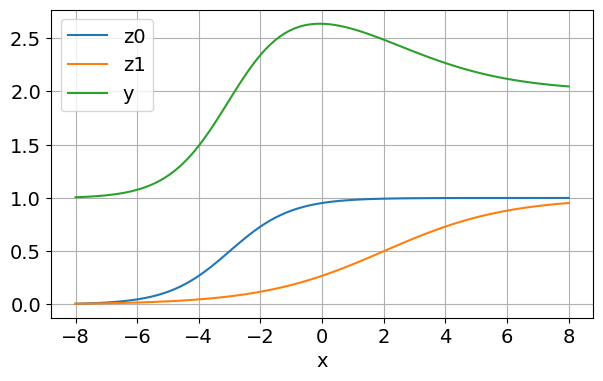

In [5]:
# list 3-2-(4) 2層ニューラルネットワーク

w00 = 1
w01 = 3
w10 = 0.5
w11 = -1
v0 = 2
v1 = -1
v2 = 1

x = np.linspace(-8, 8, 100)  # 入力
z0 = sigmoid(w00 * x + w01)  # ユニット0
z1 = sigmoid(w10 * x + w11)  # ユニット1
y = v0 * z0 + v1 * z1 + v2   # 出力

plt.plot(x, z0, label='z0')
plt.plot(x, z1, label='z1')
plt.plot(x, y, label='y')
plt.legend()
plt.xlabel('x')
plt.grid(axis='both')
plt.show()


4/4 [==============================] - 0s 926us/step


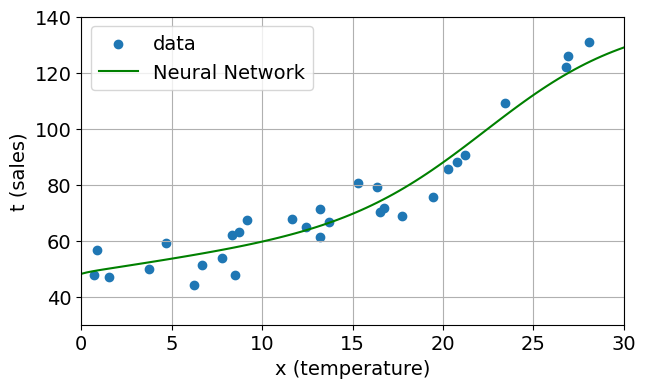

In [6]:
# list 3-2-(5) ニューラルネットワーク

from keras.models import Sequential  # (A)
from keras.layers import Dense       # (B)

# モデル生成 (C)
model = Sequential([
    Dense(32, activation='sigmoid', input_dim=1), # 中間層の定義 (D)
    Dense(1, activation='linear'),                # 出力層の定義 (E)
])
model.compile(optimizer='adam', loss='mse')       # Adam の設定 (F)
# 学習 (G)
history = model.fit(
    xs.reshape(-1, 1), ts.reshape(-1, 1),
    batch_size=len(xs), epochs=10000, verbose=0,
    ) 
# 予測 (H)
xs_pred = np.linspace(x_range[0], x_range[1], 100)
ys_pred = model.predict(xs_pred.reshape(-1, 1))
# 結果表示 (I)
plt.scatter(xs, ts, label='data')
plt.plot(xs_pred, ys_pred, 'green', label='Neural Network')

def plt_setting():                    # グラフの調整の関数定義 (J)
    plt.legend()
    plt.xlim(x_range)
    plt.ylim(t_range)
    plt.xlabel('x (temperature)')
    plt.ylabel('t (sales)')
    plt.grid(axis='both')

plt_setting()
plt.show()

MSE = 35.1


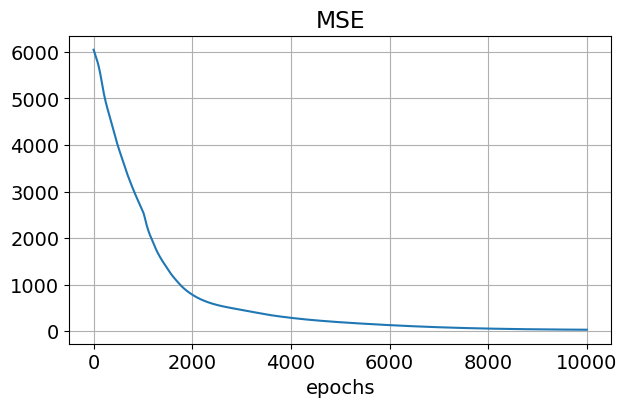

In [7]:
# list 3-2-(6) ニューラルネットの学習曲線

print(f"MSE = {history.history['loss'][-1]:.1f}")
plt.plot(history.history['loss'])
plt.title('MSE')
plt.xlabel('epochs')
plt.grid(axis='both')
plt.show()

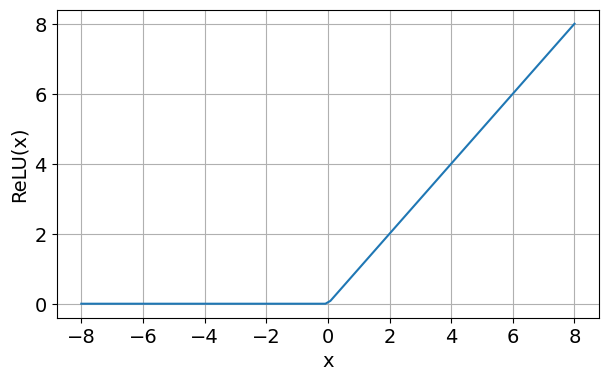

In [8]:
# list 3-2-(7) ReLU関数

def relu(x):
    return np.maximum(0, x)  # 式(3-21)  (A)

x = np.linspace(-8, 8, 100)
y = relu(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(axis='both')
plt.show()

4/4 [==============================] - 0s 1ms/step
MSE = 39.6


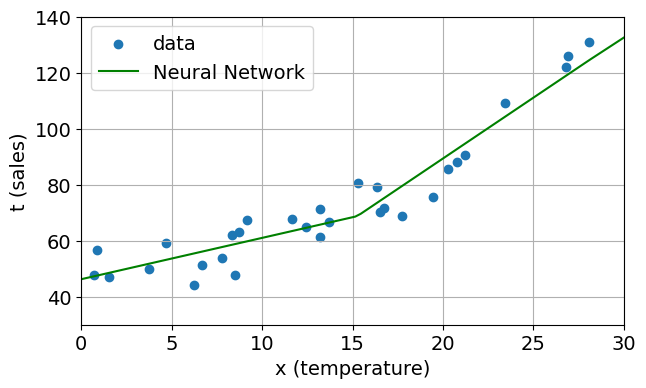

In [9]:
# list 3-2-(8) ReLU関数を使ったニューラルネットワーク

from keras.models import Sequential
from keras.layers import Dense      

# モデル生成
model = Sequential([
    Dense(32, activation='relu', input_dim=1), # <-- ReLU (A)
    Dense(1, activation='linear'),                # 出力層の定義
])
model.compile(optimizer='adam', loss='mse')       # Adam の設定
# 学習
history = model.fit(
    xs.reshape(-1, 1), ts.reshape(-1, 1),
    batch_size=len(xs), epochs=10000, verbose=0,
    ) 
# 予測
xs_pred = np.linspace(x_range[0], x_range[1], 100)
ys_pred = model.predict(xs_pred.reshape(-1, 1))
# 結果表示
print(f"MSE = {history.history['loss'][-1]:.1f}")  # MSE表示 (B)
plt.scatter(xs, ts, label='data')
plt.plot(xs_pred, ys_pred, 'green', label='Neural Network')
plt_setting()
plt.show()

MSE = 39.6


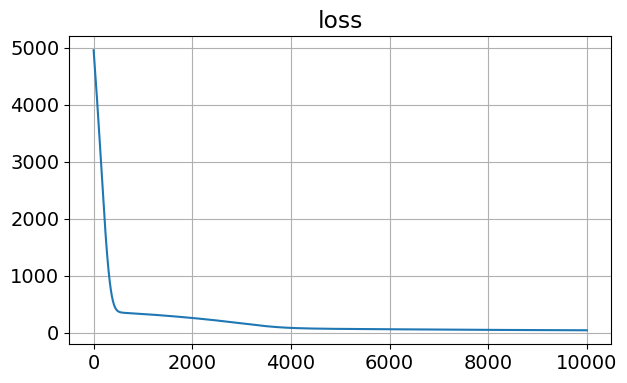

In [10]:
# 本書での記載はなし
# 学習曲線表示
plt.plot(history.history['loss'])
plt.title('loss')
plt.grid(axis='both')
print(f"MSE = {history.history['loss'][-1]:.1f}")

4/4 [==============================] - 0s 1ms/step
MSE = 7.6


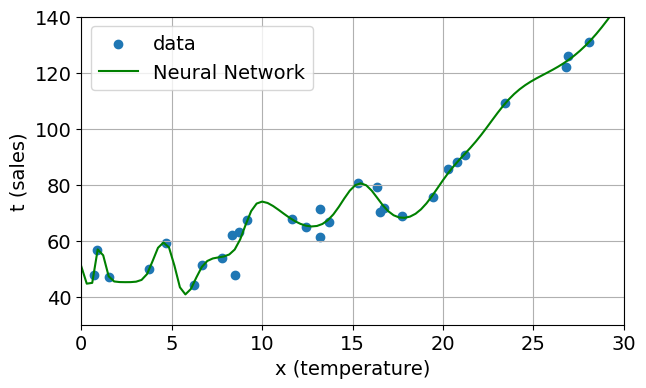

In [11]:
# 図3-24 本書での記載はなし
from keras.models import Sequential
from keras.layers import Dense

n_batch = len(xs)
# モデル生成
model = Sequential([
    Dense(32, activation='sigmoid', input_dim=1),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mse')
# 学習
history = model.fit(
    xs.reshape(-1, 1), ts.reshape(-1, 1),
    batch_size=n_batch,
    epochs=40000, verbose=0) # <-------ここのみ変更
# 予測
xs_pred = np.linspace(x_range[0], x_range[1], 100)
ys_pred = model.predict(xs_pred.reshape(-1, 1))
# 結果表示
plt.scatter(xs, ts, label='data')
plt.plot(xs_pred, ys_pred, 'green', label='Neural Network')
plt_setting()
print(f"MSE = {history.history['loss'][-1]:.1f}")

In [12]:
# list 3-2-(9) 訓練データとテストデータ

n_train = 20
xs_train = xs[:n_train].reshape(-1, 1)
ts_train = ts[:n_train].reshape(-1, 1)
xs_test = xs[n_train:].reshape(-1, 1)
ts_test = ts[n_train:].reshape(-1, 1)

4/4 [==============================] - 0s 4ms/step
train MSE = 1.7
test MSE = 78.9


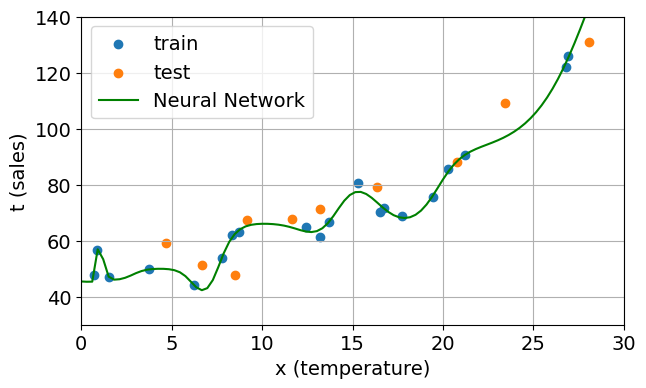

In [13]:
# list 3-2-(10) テストデータを使った学習

n_batch = len(xs)
# モデル生成
model = Sequential([
    Dense(32, activation='sigmoid', input_dim=1),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mse')
# 学習
history = model.fit(
    xs_train, ts_train,                             # 訓練データ (A)
    validation_data=(xs_test, ts_test),             # テストデータ (B)
    batch_size=n_batch,
    epochs=40000,
    verbose=0)
# 予測
xs_pred = np.linspace(x_range[0], x_range[1], 100)
ys_pred = model.predict(xs_pred.reshape(-1, 1))
# 結果表示
print(f"train MSE = {history.history['loss'][-1]:.1f}")
print(f"test MSE = {history.history['val_loss'][-1]:.1f}")

plt.scatter(xs_train, ts_train, label='train')
plt.scatter(xs_test, ts_test, label='test')
plt.plot(xs_pred, ys_pred, 'green', label='Neural Network')
plt_setting()
plt.show()

train MSE = 1.7
test MSE = 78.9
test MSEが最小となるのは 14932


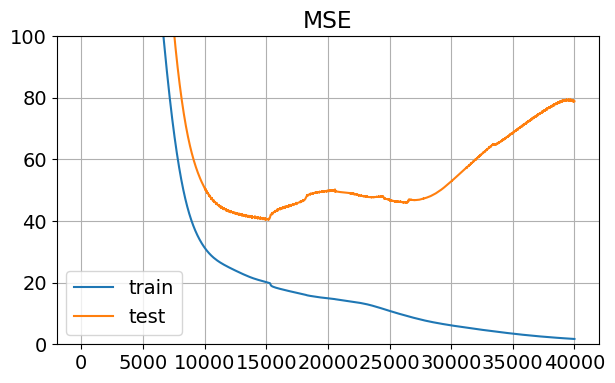

In [14]:
# list 3-2-(11) 訓練データとテストデータのMSE

print(f"train MSE = {history.history['loss'][-1]:.1f}")
print(f"test MSE = {history.history['val_loss'][-1]:.1f}")
print(f"test MSEが最小となるのは " + 
      f"{np.argmin(history.history['val_loss']):d}")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('MSE')
plt.legend()
plt.grid(axis='both')
plt.ylim(0, 100)
plt.show()

4/4 [==============================] - 0s 2ms/step
train MSE = 28.2
test MSE = 46.3


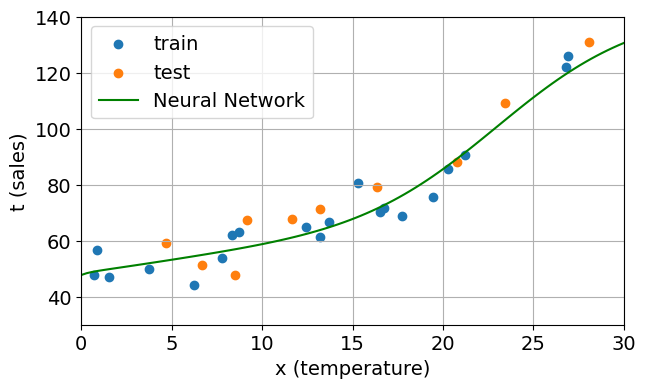

In [15]:
# list 3-2-(12) early stopping を使った学習

from keras.callbacks import EarlyStopping            # (A)

early_stopping = EarlyStopping(            # early stopping を定義 (B)
    monitor='val_loss',  # 監視する値 (C)
    patience=10,         # 改善しなくなってから止めるまでのエポック数 (D)
)

n_batch = len(xs)
# モデル生成
model = Sequential([
    Dense(32, activation='sigmoid', input_dim=1),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mse')
# 学習
history = model.fit(
    xs_train, ts_train,
    validation_data=(xs_test, ts_test),
    batch_size=n_batch, 
    epochs=40000, 
    callbacks=[early_stopping],     # early stopping をセット (E)
    verbose=0)
# 予測
xs_pred = np.linspace(x_range[0], x_range[1], 100)
ys_pred = model.predict(xs_pred.reshape(-1, 1))
# 結果表示
print(f"train MSE = {history.history['loss'][-1]:.1f}")
print(f"test MSE = {history.history['val_loss'][-1]:.1f}")
plt.scatter(xs_train, ts_train, label='train')
plt.scatter(xs_test, ts_test, label='test')
plt.plot(xs_pred, ys_pred, 'green', label='Neural Network')
plt_setting()
plt.show()